In [1]:
# step 1 : Importing
import pandas as pd

In [2]:
url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'

In [3]:
# Step 2. Read data
df = pd.read_csv(url)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# info
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

In [6]:
# Step3. X and Y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
# install xgboost
#!pip install xgboost

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2 ,random_state = 40)

In [9]:
from xgboost import XGBClassifier
clss = XGBClassifier()
clss.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
y_pred = clss.predict(x_test)

In [11]:
from sklearn.metrics import f1_score
print(f"Accuracy is {f1_score(y_test,y_pred)*100}")

Accuracy is 86.11111111111111


In [12]:
import matplotlib.pyplot as plt

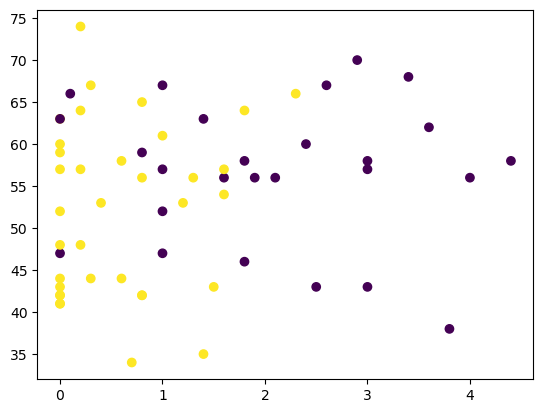

In [13]:
plt.scatter(x_test['oldpeak'].values , x_test['age'].values , c = y_test)

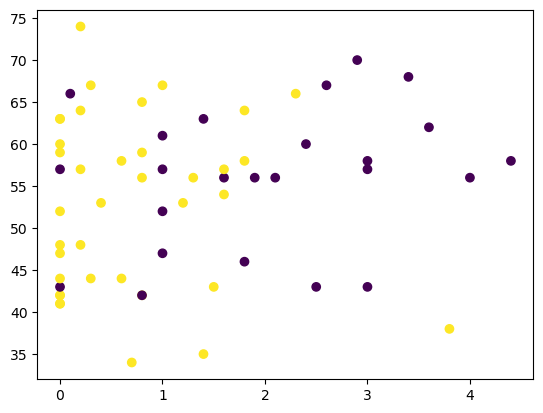

In [14]:
plt.scatter(x_test['oldpeak'].values , x_test['age'].values , c = y_pred)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40)

In [17]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_predknn = neigh.predict(x_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
print(f"Accuracy is {f1_score(y_test,y_predknn)*100}% ")

Accuracy is 73.52941176470588% 


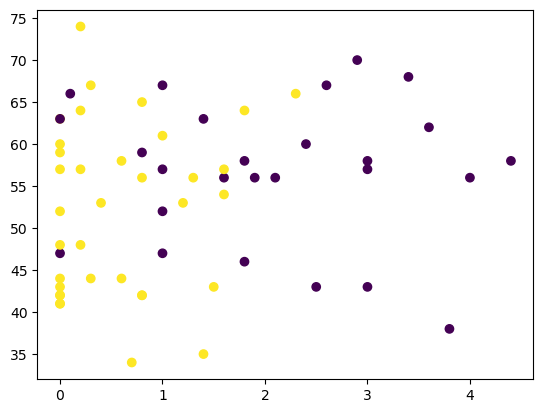

In [20]:
plt.scatter(x_test['oldpeak'].values , x_test['age'].values , c = y_test)

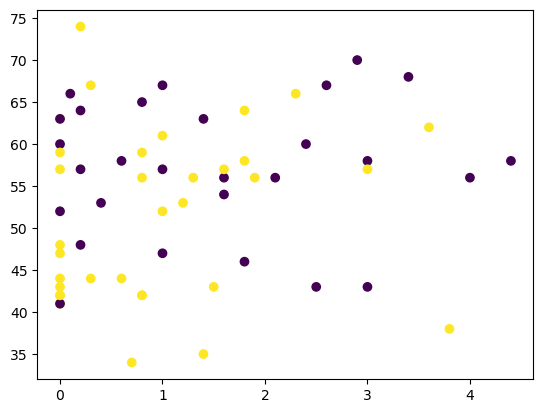

In [21]:
plt.scatter(x_test['oldpeak'].values , x_test['age'].values , c = y_predknn)